<strong><b><font size="5">Time Series Characterisation</font></b></strong>
    Webster Gova



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-1"><span class="toc-item-num">
1&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Importing-Libraries-for-time-series-forecasting" data-toc-modified-id="Importing-Libraries-for-time-series-forecasting-3"><span class="toc-item-num">
2&nbsp;&nbsp;</span>Importing Libraries for time series forecasting</a></span></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-4"><span class="toc-item-num">
3&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#Data-Preprocessing-and-Visualization" data-toc-modified-id="Data-Preprocessing-and-Visualization-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing and Visualization</a></span><ul class="toc-item"><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-4.1"><span class="toc-item-num">
4.1&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF-plots" data-toc-modified-id="ACF-and-PACF-plots-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>ACF and PACF plots</a></span></li><li><span><a href="#Plotting-Rolling-Statistics" data-toc-modified-id="Plotting-Rolling-Statistics-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Plotting Rolling Statistics</a></span></li><li><span><a href="#Augmented-Dickey-Fuller-Test" data-toc-modified-id="Augmented-Dickey-Fuller-Test-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Augmented Dickey-Fuller Test</a></span></li></ul></li><li><span><a href="#Making-Time-Series-Stationary" data-toc-modified-id="Making-Time-Series-Stationary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Making Time Series Stationary</a></span><ul class="toc-item"><li><span><a href="#Transformations" data-toc-modified-id="Transformations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Transformations</a></span><ul class="toc-item"><li><span><a href="#Log-Scale-Transformation" data-toc-modified-id="Log-Scale-Transformation-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Log Scale Transformation</a></span></li><li><span><a href="#Other-possible-transformations:" data-toc-modified-id="Other-possible-transformations:-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>Other possible transformations:</a></span></li></ul></li><li><span><a href="#Techniques-to-remove-Trend---Smoothing" data-toc-modified-id="Techniques-to-remove-Trend---Smoothing-5.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Techniques to remove Trend - Smoothing</a></span><ul class="toc-item"><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Moving Average</a></span></li><li><span><a href="#Exponentially-weighted-moving-average:" data-toc-modified-id="Exponentially-weighted-moving-average:-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Exponentially weighted moving average:</a></span></li></ul></li><li><span><a href="#Further-Techniques-to-remove-Seasonality-and-Trend" data-toc-modified-id="Further-Techniques-to-remove-Seasonality-and-Trend-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Further Techniques to remove Seasonality and Trend</a></span><ul class="toc-item"><li><span><a href="#Differencing" data-toc-modified-id="Differencing-4.2.3.1"><span class="toc-item-num">4.2.3.1&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-4.2.3.2"><span class="toc-item-num">4.2.3.2&nbsp;&nbsp;</span>Decomposition</a>

# Time Series
- A time series is a sequential set of data points, measured typically over successive times. 
- It is mathematically defined as a set of vectors x(t), t = 0,1,2,... where t represents the time elapsed. 
- The variable x(t) is treated as a random variable. 
- The measurements taken during an event in a time series are arranged in a proper chronological order. 
- A time series containing records of a single variable is termed as univariate, and more than one variable a multivariate. 

# Importing Libraries for time series forecasting

In [91]:
import numpy as np
import pandas as pd; pd.set_option('display.expand_frame_repr', False); pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm; from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller;from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR; from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib; import matplotlib.pyplot as plt
matplotlib.colors ; matplotlib.rcParams['axes.labelsize'] = 14 ; matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12; matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns ; from random import random; from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

import warnings; warnings.filterwarnings("ignore"); plt.style.available; plt.style.use('bmh'); import os

# Importing data
- Dataset: Trade data:
    - location_id: /- product_id: SITC 4 digit code system
    - year: from 1963 to 2017  - export_value: / - import_value: - / - export_rca:
    - is_new: / - cog: / - distance: / - normalized_distance: / - normalized_cog:
    - normalized_pci: /- export_rpop: / - sitc_eci: / - sitc_coi: / - pci: /- location_code: /- location_name_short_en:
    - sitc_product_code: / - sitc_product_name_short_en: /- Unit: arbitrary

In [92]:
product = 'engine_parts'

def load_data(csv_name,trade_form,target_value, snfilter,code_system,sitc_code,ts_type):
    '''
    Ingests a SITC multi-time series trade data in csv format, filters for one product code, and renames target columns
    & creates dataframe of target columns
    
    Parameters:
    -----------
    csv_name: string
        file in csv format containing the time series export data
    trade_form: string
        describes the nature of the trade being conducted by countries being analysed. Takes arguments "importer" or "exporter"
    target_value: string
        value to be analysed, takes arguments "export_value" or "import_value"
    snfilter: string
        used to reduce the signal to noise ratio for the analysis. Takes arguments; "export_rca"
    code_system: string
        based on the trade UN system code, takes arguments; sitc_product_code 
    sitc_code: string
        sitc 4 digit product code. Takes arguments for any product in the sitc code system
    ts_type: string
        identifies time series interval, takes arguments "year"    
    '''
    million = 1000000
    data = pd.read_csv(csv_name)#,header=None
    dframe = data.loc[data[code_system]==sitc_code]
    dframe.rename(columns={'location_name_short_en': 'exporter','export_rca': 'rca'}, inplace=True)
    dframe = dframe[[ts_type,trade_form,target_value,snfilter]]
    dframe = dframe[dframe[trade_form] != 'Undeclared Countries']
    dframe[target_value].replace('',0, inplace=True)
    dframe = dframe[dframe[target_value] != 0]
    dframe[target_value] = dframe[target_value]/million
    dframe = dframe[dframe[snfilter] >= 0.01]
    return dframe

In [93]:
xdf = load_data('sitc4digit_year.csv','exporter','export_value','rca','sitc_product_code',7132,'year')
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 6133567 to 6145058
Data columns (total 4 columns):
year            4282 non-null int64
exporter        4282 non-null object
export_value    4282 non-null float64
rca             4282 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 167.3+ KB


In [94]:
print('Shape of the dataframe: {}'.format(xdf.shape))
print('Data ranges from {} to {}'.format(xdf.year.min(),xdf.year.max()))
print('Countries not declared are {} out of {}'.format(xdf['exporter'].loc[xdf['exporter']=='Undeclared Countries'].count(),xdf.exporter.count()))
print('Zero export values: {}'.format(xdf['export_value'][xdf['export_value']==0].count()))
print('Null export values: {}'.format(xdf['export_value'].isnull().sum()))

Shape of the dataframe: (4282, 4)
Data ranges from 1962 to 2017
Countries not declared are 0 out of 4282
Zero export values: 0
Null export values: 0


# Data Preprocessing and Visualization

__Converting to datetime format:__

In [95]:
xdf['year'] = pd.to_datetime(xdf['year'], format='%Y')

In [96]:
xdf = xdf.drop(columns=["rca"])
xdf.columns

Index(['year', 'exporter', 'export_value'], dtype='object')

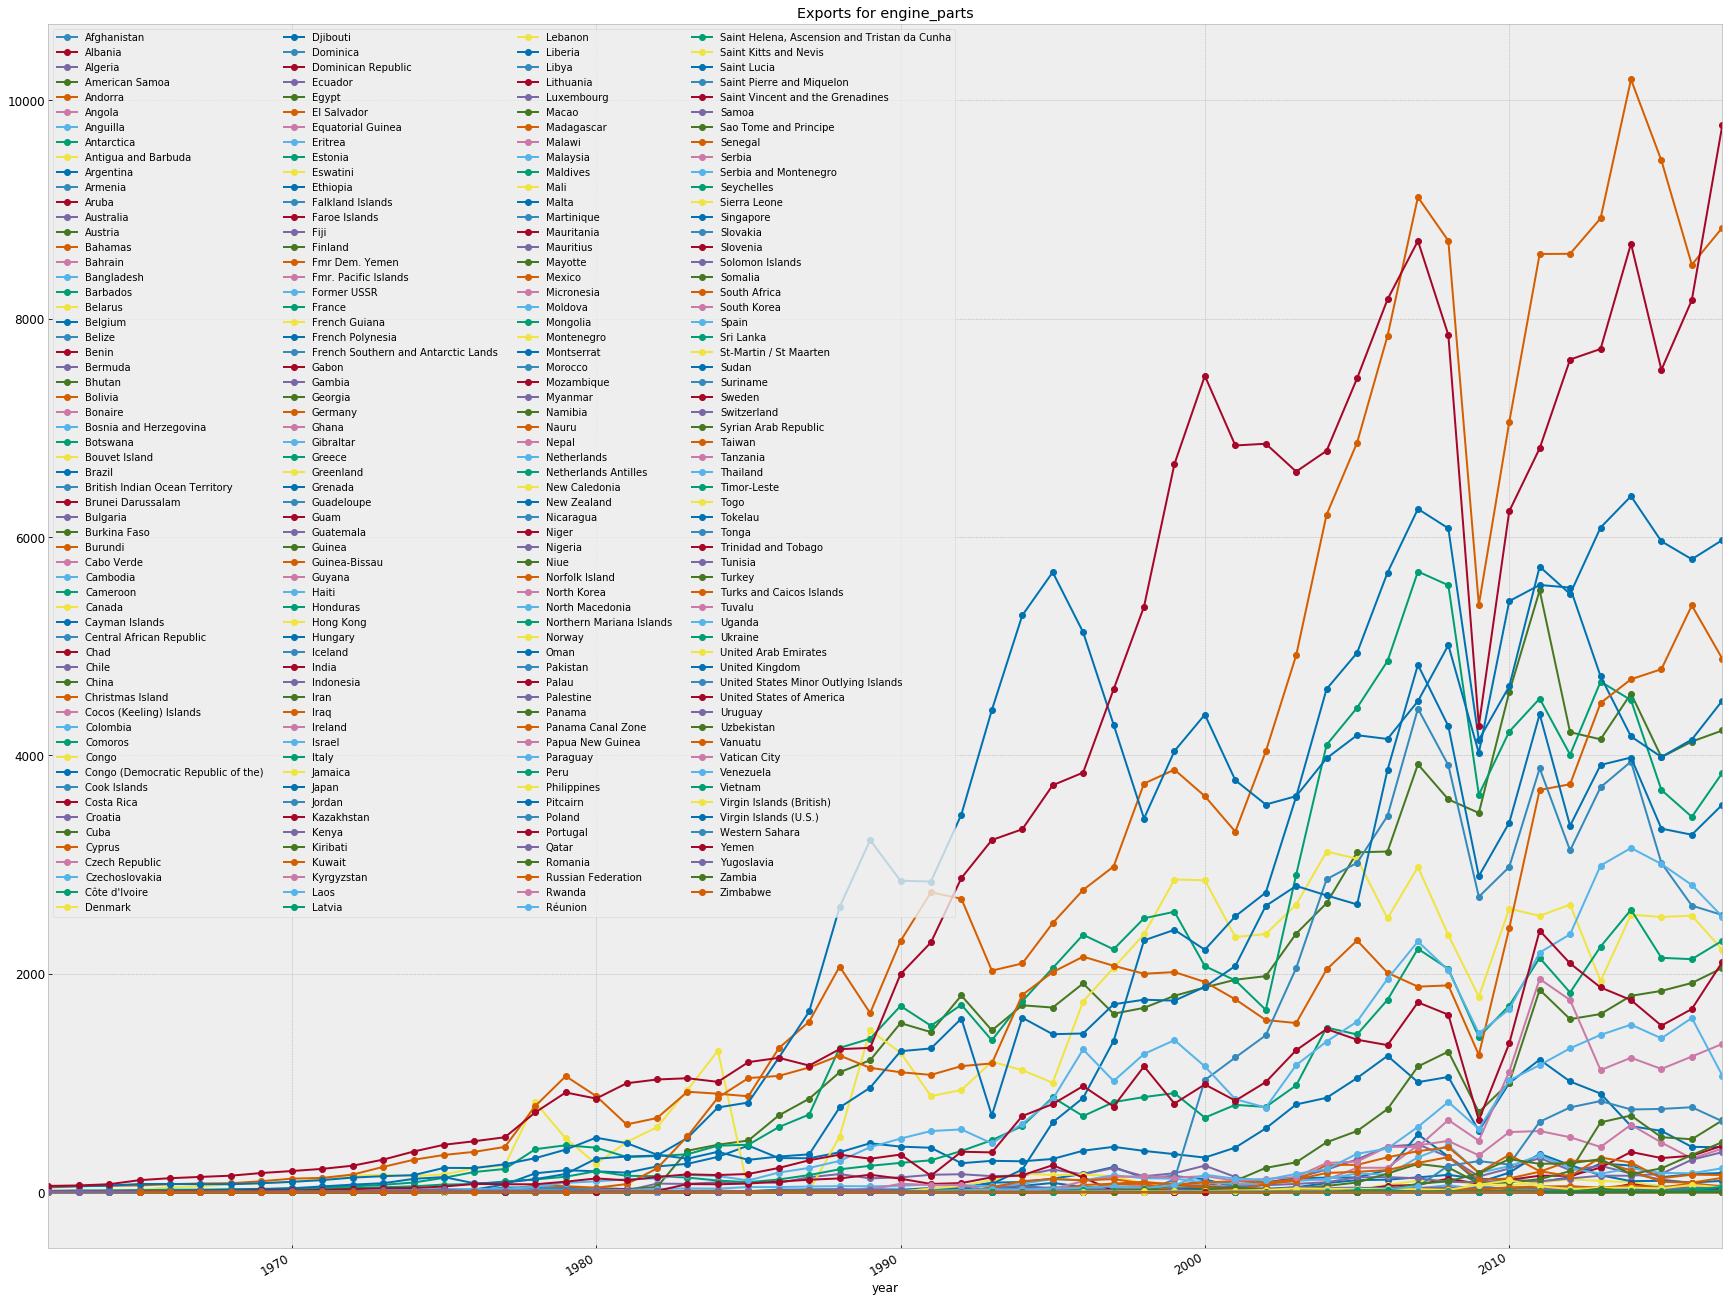

In [97]:
fig, ax = plt.subplots(figsize=(30,25))
chart_title = 'Exports for {}'.format(product)
for key, grp in xdf.groupby(['exporter']):
        ax = grp.plot(ax=ax, kind='line', x='year', y='export_value', label=key, marker='o',title=chart_title)
        ax.legend(ncol=4, loc='best')

target = 'images\\'
savefile = os.path.join(os.getcwd(),target,product,str(chart_title))
plt.savefig(savefile)
#xdf.groupby('exporter').plot(x='year', y='export_value',title=xdf.exporter.)


In [98]:
df_grp = xdf.set_index('year')
df_grp.head(2)

,exporter,export_value
year,,
2003-01-01,Aruba,0.111711
2010-01-01,Aruba,0.125121


In [99]:
#df_grps = df_grp.groupby('exporter').mean().unstack()
df_grps = xdf.groupby([xdf.year.name, xdf.exporter.name]).mean().unstack()
#xport_grps.plot()
df_grps.head(2)

export_value                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
exporter    Afghanistan   Albania Algeria American Samoa Andorra Angola Anguilla Antarctica Antigua and Barbuda Argentina Armenia Aruba Australia   Austria   Bahamas   Bahrain Bangladesh  Barbados Belarus   Belgium Belize     Benin   Bermuda Bhutan   Bolivia Bonaire Bosnia and Herzegovina Botswana Bouvet Island Brazil British Indian Ocean Territory Brunei Darussalam  Bulgaria Burkina Faso   Burundi Cabo Verde  Cambodia  Cameroon    Canada Cayman Islands Central African Republic Chad     Chile China Christmas Island Cocos (Keeling) Islands Colombia Comoros     Congo Congo (Democratic Republic of the) Cook Islands Costa Rica Croatia Cuba    Cyprus Czech Republic Czechoslovakia Côte d'Ivoire   Denmark  Djibouti Dominica Dominican Republic Ecuador     Egypt El Salvador Equatorial Guinea Eritrea Estonia Eswatini  Ethiopia Falkland Islands Faroe Islands      Fiji   Finland Fmr Dem. Yemen Fmr. Pacific Islands Former USSR     France French Guiana French Polynesia French Southern and Antarctic Lands     Gabon    Gambia Georgia    Germany     Ghana Gibraltar    Greece Greenland Grenada Guadeloupe Guam Guatemala Guinea Guinea-Bissau    Guyana Haiti Honduras Hong Kong   Hungary   Iceland     India Indonesia Iran Iraq  

In [100]:
len(df_grps.columns)

235

In [101]:
#df_grps = df_grps.dropna(axis='columns')

In [102]:
df_grps.columns = df_grps.columns.droplevel()
df_grps = df_grps.droplevel('year')#,axis=1)
df_grps.head(3)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [ ]:
len(df_grps.columns)

In [72]:
#df_grps['exporter']
#df_grps = df_grps['export_value']
#eng_parts_xporters = df_grps.columns

__Setting index as the datetime column for easier manipulations:__

In [73]:
#df_pivoted = xdf.pivot_table(index='year',columns='exporter',values='export_value',aggfunc='sum')
#df_pivoted.plot(legend=True)#,subplots=True)#, legend=False)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\16353\\Documents\\ThaW\\PhD\\time_series_trade\\images\\engine_parts\\engine_parts\\Global trends in export values for engine parts.png'

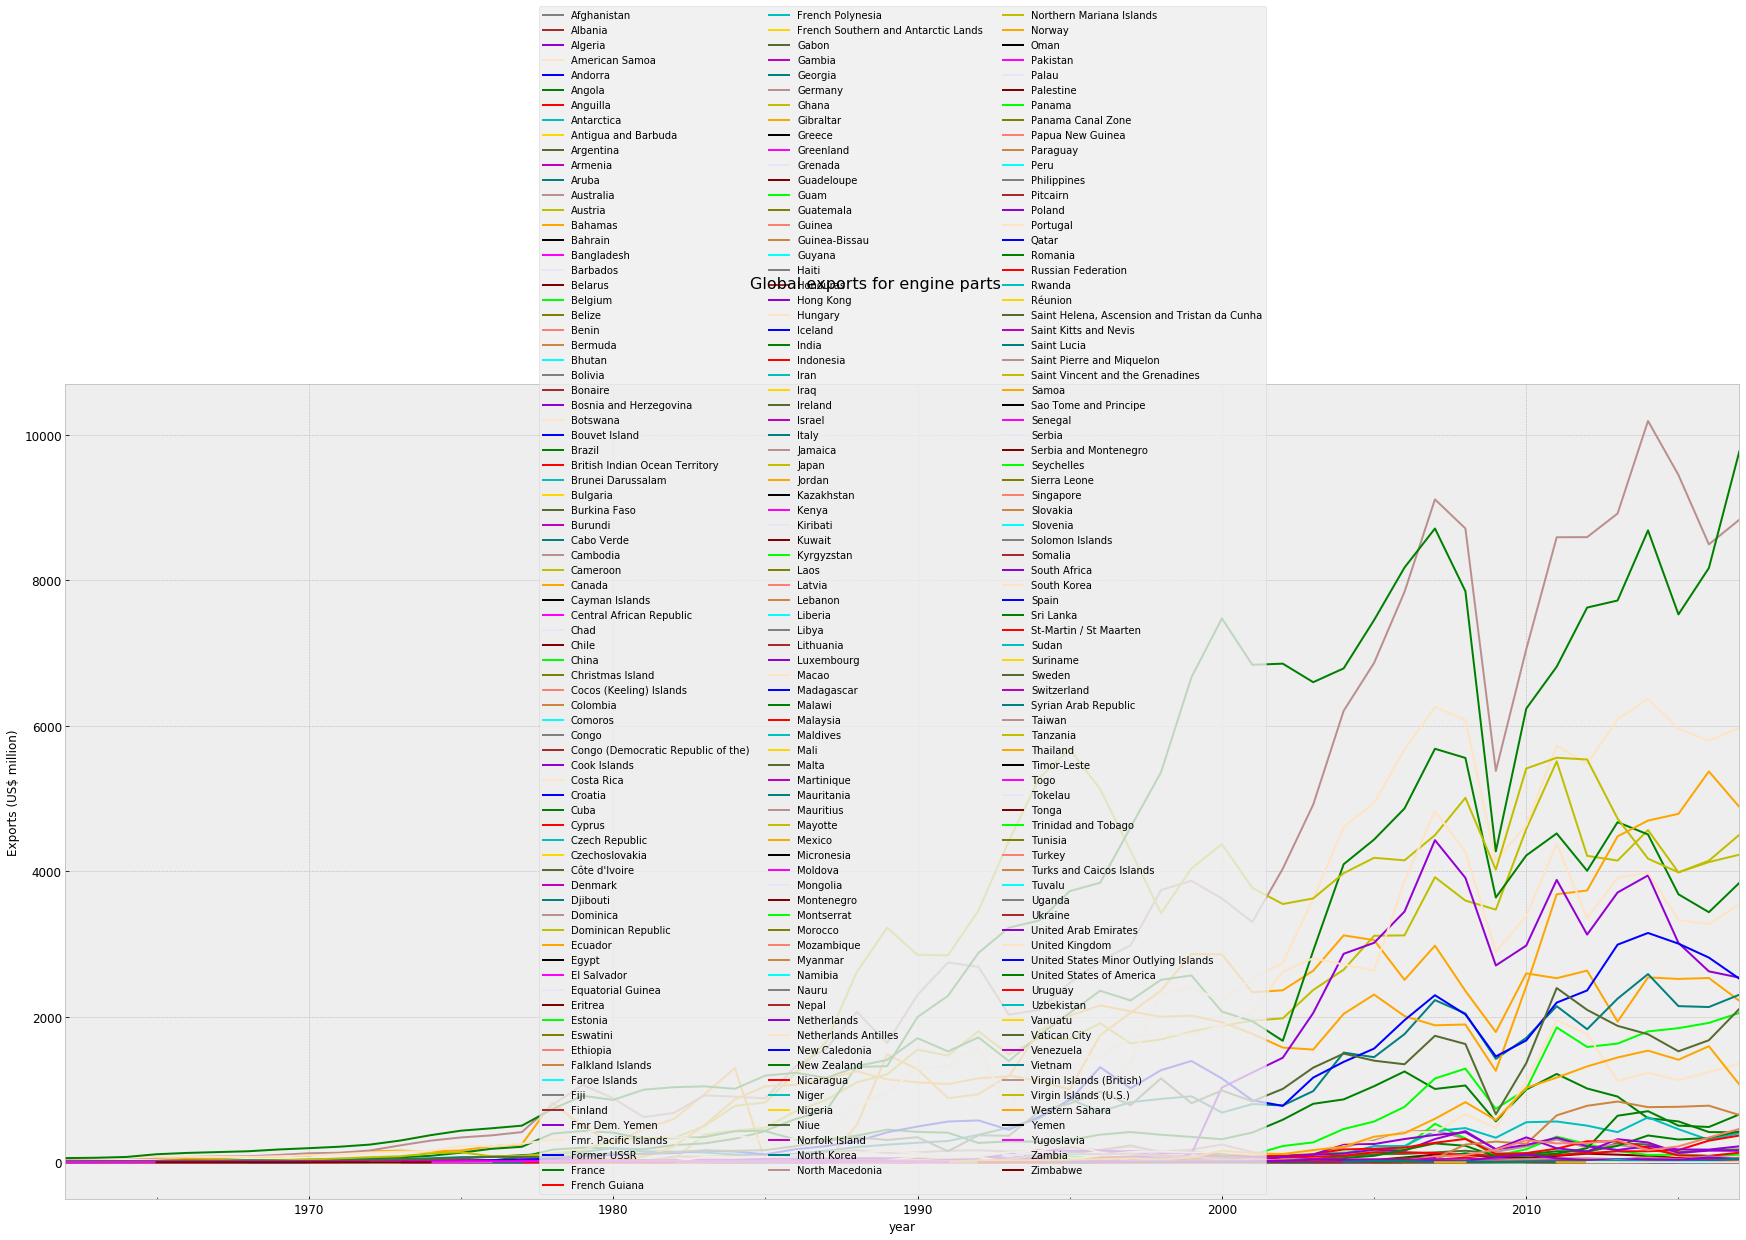

In [74]:
#df_pivoted = xdf.pivot_table(index='year',columns='exporter',values='export_value',aggfunc='sum')
fig1, ax1 = plt.subplots(figsize=(30,15))
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors = ["gray","brown","darkviolet","bisque","b","g","r","c","gold","darkolivegreen","m","teal","rosybrown","y","orange","k","fuchsia","lavender","maroon","lime",
          "olive","salmon","peru","aqua"]
label='Global trends in export values for engine parts'
df_grps.plot(ax=ax1,label=label,color=colors)
ax1.set_ylabel('Exports (US$ million)')
fig1.suptitle("Global exports for engine parts", fontsize=16)

plt.legend(ncol=3,loc='best')

location = os.getcwd()
target = 'images\\engine_parts'
path = os.path.join(location, target,product)
savefile = os.path.join(path, label)
plt.savefig(str(savefile))
#.plot(legend=False)#subplots=True, legend=False)

In [ ]:
# Adapted from https://stackoverflow.com/questions/30942755/plotting-multiple-time-series-after-a-groupby-in-pandas
# Modified from https://www.programcreek.com/python/example/98021/matplotlib.dates.YearLocator
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

def plot_multiple_time_series(dframe, ts_label, grp_label, values_label, product,figsize=(30,15), title=None):
    '''
    Plots multiple time series on one chart by first grouping time series based on series names from column in dataframe

    Parameters:
    ----------
    dframe : timeseries Pandas dataframe
    ts_label : string
        The name of the df column that has the datetime timestamp x-axis values.
    grp_label : string
        The column name in dframe for groupby method.
    values_label : string
        The column name in dframe for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = YearLocator()
    xtick_dateformatter = DateFormatter('%Y')
    fig, ax = plt.subplots(figsize=figsize)
    location = os.getcwd()
    target = 'images\\'
    path = os.path.join(location, target,product)
    for key, grp in dframe.groupby([grp_label]):
        ax = grp.plot(ax=ax, kind='line', x=ts_label, y=values_label, label=key, marker='o')
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(ncol=5, loc='upper left')
    #_ = plt.xticks(rotation=0, )
    _ = plt.grid()
    _ = plt.xlabel('year')
    _ = plt.ylabel('Exports (US$ million)')
    _ = plt.ylim(0, dframe[values_label].max() * 1.25)
    if title is not None:
        _ = plt.title(title)
    savefile = os.path.join(path, label)
    plt.savefig(str(savefile))
    _ = plt.show()

In [ ]:
plot_multiple_time_series(xdf, 'year', 'exporter', 'export_value', 'engine_parts',title='Global export trends for engine parts')

__Reviewing plots of the density of observations can provide further insight into the structure of the data:__
- The distribution is not perfectly Gaussian (normal distribution).
- The distribution is left shifted.
- Transformations might be useful prior to modelling.

In [ ]:
#y = df_grps.set_index('year')
#y.index

In [ ]:
from pandas import Series
from matplotlib import pyplot

pyplot.figure(1,figsize=(30,15))
#pyplot.subplot(211)
df_grps.hist(figsize=(30,15))
#pyplot.subplot(212)
#df_grps.plot(kind='line',figsize=(30,15))
pyplot.show()

#y.passengers.hist()
#y.passengers.plot(kind='kde')
pyplot.savefig(str("Histograms_df_grps"))

__Box and Whisker Plots:__
- Median values across years confirms an upwards trend
- Steady increase in the spread, or middle 50% of the data (boxes) over time
- A model considering seasonality might work well

In [ ]:
y = xdf.set_index('year')

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.export_value.index.year,y.export_value,ax=ax)
#sns.boxplot(y.export_value.index.year, y.export_value, ax=ax)

__Decomposing using statsmodel:__
- We can use statsmodels to perform a decomposition of this time series. 
- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. 
- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_grps, model='additive')
fig = decomposition.plot()
#plt.title('Decomposition of export time series')
plt.savefig(str('Decompose'))
plt.show()

## Stationarity
- Most of the Time Series models work on the assumption that the TS is stationary. 
- Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

__Notes from__ [Alkaline ML]</https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html/>

- tests of stationarity for testing a null hypothesis that an observable univariate time series is stationary around a deterministic trend (i.e. trend-stationary).
- A time series is __stationary when its mean, variance and auto-correlation, etc., are constant over time__. 
- Many time-series methods may perform better when a time-series is stationary, since forecasting values becomes a far easier task for a stationary time series (high probability of behaving the same way)
- ARIMAs that include differencing (i.e., d > 0) assume that the data becomes stationary after differencing. 
- This is called __difference-stationary__
- Auto-correlation plots are an easy way to determine whether your time series is sufficiently stationary for modeling. 
- If the plot does not appear relatively stationary, your model will likely need a differencing term. 
- These can be determined by using an Augmented Dickey-Fuller test, or various other statistical testing methods. 
- Note that auto_arima will automatically determine the appropriate differencing term for you by default.

In order to quantitatively determine whether we need to difference our data in order to make it stationary, we can conduct a test of stationarity

__We can check stationarity using the following:__

1. __ACF and PACF plots__:
    - If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
2. __Plotting Rolling Statistics__: 
    - We can plot the moving average or moving variance and see if it varies with time. 
    - __Moving average/variance__ is for any instant ‘t’, the average/variance of the last period (e.g year or last 12 months)
3. __Augmented Dickey-Fuller Test:__
    - This is one of the statistical tests for checking stationarity.
    - Here the __null hypothesis is that the TS is non-stationary__. 
    - The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
    - If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

### ACF and PACF plots

- Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
- If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- This data is non-stationary as a high number of previous observations are correlated with future values.
- Confidence intervals are drawn as a cone. 
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import os

columns = df_grps.columns
y = df_grps.columns[1:]
cycles = int((len(df_grps))/5)
path = os.getcwd()+'\\images\\engine_parts\\acf_pacf\\'
for col in y:
    pyplot.figure(figsize=(15,6))
    pyplot.subplot(121)
    plot_acf(df_grps[col], ax=pyplot.gca(),title="{} - Autocorrelation".format(df_grps[col].name))
    pyplot.subplot(122)
    plot_pacf(df_grps[col], ax=pyplot.gca(),title="{} - Partial Autocorrelation".format(df_grps[col].name))
    savefile = os.path.join(path, df_grps[col].name)
    pyplot.savefig(str('{}_ACF_PACF'.format(savefile)))
    pyplot.show()

### Plotting Rolling Statistics
- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

In [ ]:
columns = df_grps.columns
y = df_grps.columns[1:]
cycles = int((len(df_grps))/5)

for col in y:
    pyplot.figure(figsize=(15,6))

    rolmean = df_grps[col].rolling(2).mean()
    rolstd = df_grps[col].rolling(cycles).std()
    location = os.getcwd()
    target = 'images\\engine_parts\\rolling_stats\\'
    path = os.path.join(location, target)
    
    #Plot rolling statistics:
    orig = plt.plot(df_grps[col], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('{}: Rolling Mean & Standard Deviation'.format(df_grps[col].name))
    savefile = os.path.join(path, df_grps[col].name)
    plt.savefig(str('{}_Rolling_Stats'.format(savefile)))
    plt.show(block=False)

### Augmented Dickey-Fuller  (ADF) Test
- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
columns = df_grps.columns
y = df_grps.columns[1:]

df = []
for col in y:
#Perform Dickey-Fuller test:
    dftest = adfuller(df_grps[col], autolag='AIC')
    df = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        df['Critical Value (%s)'%key] = value
df.append
df
        
df

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. __Seasonality__ – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

### Transformations
- We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

#### Log Scale Transformation

### Techniques to remove Trend - Smoothing
- Smoothing is taking rolling averages over windows of time

In [ ]:
ts_log = np.log(df_grps['Argentina'])
plt.plot(ts_log)

#### Moving Average
- We take average of ‘k’ consecutive values depending on the frequency of time series. 
- Here we can take the average over the past 1 year, i.e. last 12 values. 
- A drawback in this particular approach is that the time-period has to be strictly defined. 

In [ ]:
moving_avg = ts_log.rolling(5).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log.Argentina - moving_avg.Argentina
ts_log_moving_avg_diff.head(12)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

#### Exponentially weighted moving average:
- To overcome the problem of choosing a defined window in moving average, we can use exponential weighted moving average
- We take a ‘weighted moving average’ where more recent values are given a higher weight. 
- There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. 

In [ ]:
expwighted_avg = ts_log.ewm(com=0.5).mean()
#df.ewm(com=0.5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log.passengers - expwighted_avg.passengers
test_stationarity(ts_log_ewma_diff)

### Further Techniques to remove Seasonality and Trend
- The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. 

#### Differencing
- In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 
- First order differencing in Pandas

In [ ]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

#### Decomposition
- In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual.passengers
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Time Series forecasting
[Statsmodel example notebooks](https://github.com/statsmodels/statsmodels/tree/master/examples/notebooks)

## Autoregression (AR)
- The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [ ]:
from statsmodels.tsa.ar_model import AR
from random import random

In [ ]:
# fit model
model = AR(ts_log_diff)
model_fit = model.fit()

In [ ]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

## Interpreting ACF plots


ACF Shape	| Indicated Model |
-- | -- |
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |